In [3]:
import os
import sys
import bandits as bd

In [4]:
n_arms = 10
bandit = bd.GaussianBandit(n_arms)
n_trials = 1000
n_experiments = 500

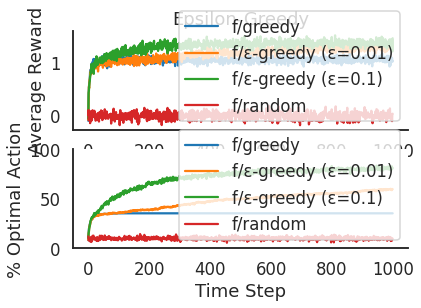

In [6]:
from bandits.agent import Agent 
from bandits.policy import Policy
import numpy as np

class RandomPolicy(Policy):
    """
    The random policy is really the baseline here. What we are up against
    """

    def __str__(self):
        return '\u03B5-Random'

    def choose(self, agent):
        return np.random.choice(len(agent.value_estimates))

agents = [
    bd.Agent(bandit, bd.GreedyPolicy()),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.01)),
    bd.Agent(bandit, bd.EpsilonGreedyPolicy(0.1)),
    bd.Agent(bandit, bd.RandomPolicy())
]
env = bd.Environment(bandit, agents, 'Epsilon-Greedy')
scores, optimal = env.run(n_trials, n_experiments)
env.plot_results(scores, optimal)